# Prepilot Demo

In [1]:
import os
import sys
import logging
import pandas as pd
import numpy as np
import yaml

sys.path.append(os.path.dirname(os.path.abspath('')))
#from utils.spark import restart_spark
from stratification.params import SplitBuilderParams
from prepilot.params import PrepilotParams
from prepilot.prepilot_experiment_builder import PrepilotExperimentBuilder
from prepilot.prepilot_split_builder import PrepilotSplitBuilder
from auto_ab.abtest import ABTest
from auto_ab.params import ABTestParams

logging.basicConfig(level = logging.INFO)

%load_ext autoreload
%autoreload 2

/Users/egorshishkovets/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/egorshishkovets/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Cuped Demo

In [2]:
df = pd.read_csv('ab_data.csv')
ab_params = ABTestParams()
ab_test = ABTest(df, ab_params)

In [3]:
ab_test.params.data_params.treatment

array([178.61056532, 180.95401792, 167.59004221, ..., 172.9221543 ,
       172.22400376, 177.60527995])

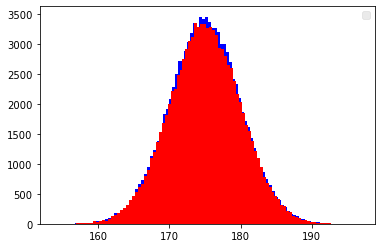

In [4]:
import matplotlib.pyplot as plt

plt.hist(ab_test.params.data_params.treatment, bins = 100, color="blue")
plt.hist(ab_test.params.data_params.control, bins=100, color="red")

plt.style.use('ggplot')
plt.legend(loc='upper right')
plt.show()

In [5]:
ab_test1 = ab_test.cuped()

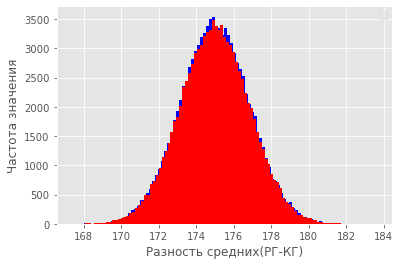

In [6]:
import matplotlib.pyplot as plt

plt.hist(ab_test1.params.data_params.treatment, bins = 100, color="blue")
plt.hist(ab_test1.params.data_params.control, bins=100, color="red")

plt.style.use('ggplot')
plt.xlabel('Разность средних(РГ-КГ)')
plt.ylabel('Частота значения')
plt.legend(loc='upper right')
plt.show()

In [7]:
df[ab_test.params.data_params.target].where(df[ab_test.params.data_params.group_col]=='A', #applied where cond is False
                                        df[ab_test.params.data_params.target]*1.001, 
                                        axis=0,
                                        inplace=True)

ab_test = ABTest(df, ab_params)

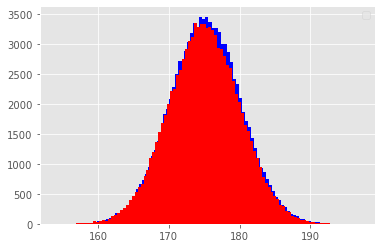

In [8]:
import matplotlib.pyplot as plt

plt.hist(ab_test.params.data_params.treatment, bins = 100, color="blue")
plt.hist(ab_test.params.data_params.control, bins=100, color="red")

plt.style.use('ggplot')
plt.legend(loc='upper right')
plt.show()

In [9]:
ab_test2 = ab_test.cuped()

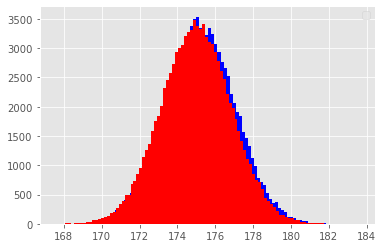

In [10]:
import matplotlib.pyplot as plt

plt.hist(ab_test2.params.data_params.treatment, bins = 100, color="blue")
plt.hist(ab_test2.params.data_params.control, bins=100, color="red")

plt.style.use('ggplot')
plt.legend(loc='upper right')
plt.show()